# Electricity price in time domain

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
electricity_price = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/raw/electricity_price/electricity_price_monthly.csv')
electricity_price = electricity_price.rename(columns = {"Month beginning":"date", "Price":'price'})
electricity_price.head()


,date,price
0,01/06/2010,42.18
1,01/07/2010,43.53
2,01/08/2010,39.95
3,01/09/2010,41.12
4,01/10/2010,43.50


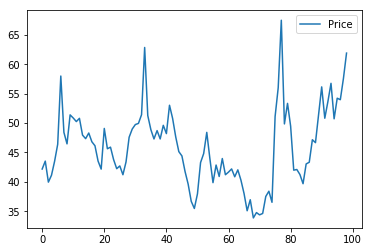

In [12]:
electricity_price.plot()
plt.show()

Convert date into datetime format

In [21]:
electricity_price.date = pd.to_datetime(electricity_price['date'])
electricity_price.head()

,date,price
0,2010-01-06,42.18
1,2010-01-07,43.53
2,2010-01-08,39.95
3,2010-01-09,41.12
4,2010-01-10,43.50


Take average price per year.

In [32]:
yearly_price = electricity_price.groupby(electricity_price.date.dt.year).mean()
yearly_price

,price
date,
2010,44.958571
2011,48.203333
2012,45.210000
2013,50.795833
2014,42.431667
2015,40.745000
2016,42.627500
2017,46.311667
2018,54.981250


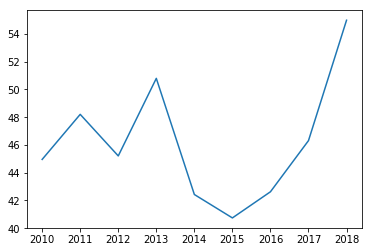

In [34]:
plt.plot(yearly_price.index, yearly_price.price)

Import demand data for UK.

In [37]:
electricity_demand = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/raw/electricity_consumption/uk_yearly_demand.csv')
electricity_demand.head()


,year,demand
0,1998,373308.0000
1,1999,380831.0000
2,2000,389743.7703
3,2001,394009.9016
4,2002,394677.2893


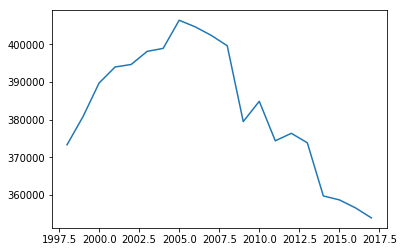

In [39]:
plt.plot(electricity_demand.year, electricity_demand.demand)

Join electricity price vs electricity demand to see correlation

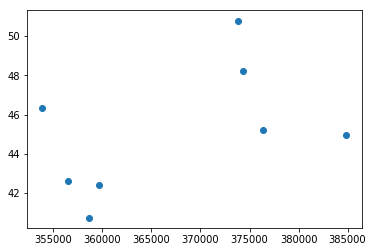

In [48]:
electricity_demand_index = electricity_demand.set_index('year')

price_demand = yearly_price.join(electricity_demand_index, how='inner')
plt.scatter(price_demand.demand, price_demand.price)